In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist=keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full=X_train_full.reshape((60000,28,28,1))  
X_test=X_test.reshape((10000,28,28,1)) 

In [6]:
# Data Normalization
X_train_n=X_train_full/10.
X_test_n=X_test/10.

In [7]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
# ANN starts from here:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

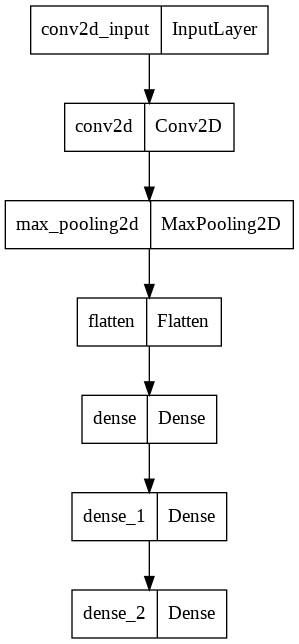

In [11]:
import pydot
keras.utils.plot_model(model)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

In [14]:
model_history=model.fit(X_train,y_train,epochs=60,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/60
844/844 [==============================] - 32s 37ms/step - loss: 0.2303 - accuracy: 0.9308 - val_loss: 0.0982 - val_accuracy: 0.9722
Epoch 2/60
844/844 [==============================] - 31s 37ms/step - loss: 0.0838 - accuracy: 0.9746 - val_loss: 0.0896 - val_accuracy: 0.9725
Epoch 3/60
844/844 [==============================] - 32s 38ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0663 - val_accuracy: 0.9802
Epoch 4/60
844/844 [==============================] - 31s 37ms/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0615 - val_accuracy: 0.9822
Epoch 5/60
844/844 [==============================] - 31s 37ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0665 - val_accuracy: 0.9812
Epoch 6/60
844/844 [==============================] - 32s 38ms/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.0635 - val_accuracy: 0.9823
Epoch 7/60
844/844 [==============================] - 31s 37ms/step - loss: 0.0172 - accuracy: 0.9955 - val_loss: 0.0532 - val_accuracy:

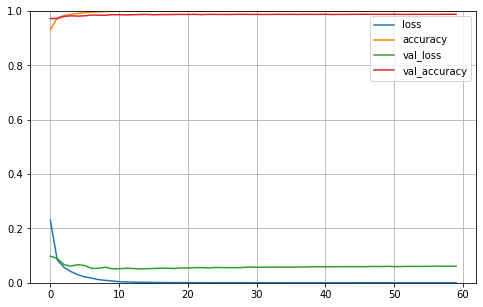

In [15]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
model.evaluate(X_test_n,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0624 - accuracy: 0.9865


[0.062378887087106705, 0.9865000247955322]

In [17]:
X_new=X_test[:3]

In [18]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 89ms/step


In [19]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [21]:
# so , predicted and actual outputs are same.